In [ ]:
!pip install PyGithub
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from github import Github
import github
matplotlib.style.use('seaborn')
%matplotlib inline

     |████████████████████████████████| 291 kB 4.7 MB/s 
     |████████████████████████████████| 961 kB 8.8 MB/s 


MLP model


,State,Number_feature,Time_Step,number_layers,MAE,RMSE,R2_Score
0,Karnataka,1,5,2,0.074,0.083,0.875
1,Karnataka,1,7,2,0.095,0.102,0.804
2,Kerala,4,5,2,0.080,0.096,0.803
3,Kerala,4,7,2,0.054,0.064,0.911
4,Kerala,4,15,2,0.063,0.073,0.863
5,Kerala,6,30,1,0.060,0.070,0.778
6,Maharashtra,2,5,2,0.092,0.098,0.635
7,Maharashtra,1,7,2,0.092,0.096,0.618
8,Maharashtra,1,15,2,0.040,0.041,0.896
9,Maharashtra,3,30,2,0.024,0.026,0.880


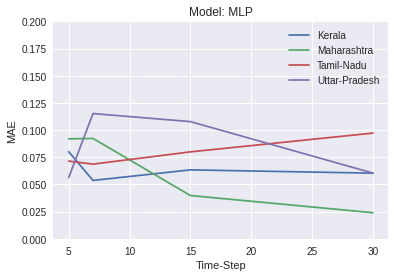

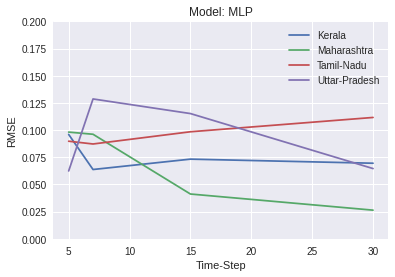

In [ ]:
pd.set_option("display.precision", 3)
Models=['MLP']#,'LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
from IPython.display import display
for model in Models:
  print(model+' model')
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+".csv").drop(columns =["Unnamed: 0"])
  df=df[df['State']!='Delhi']
  #print(df.head())
  temp1=df.groupby(['State','Time_Step']).apply(lambda df: df.loc[df.RMSE.idxmin()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  display(temp1)
  #temp1=temp1.sort_values(["State","Time_Step"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae=list(temp1['MAE'])[2:]
  rmse=list(temp1['RMSE'])[2:]
  states=list(temp1['State'])[2:]
  try:
    for i,state in enumerate(set(states)):
      x=4*i
      y=x+4
      plt.plot([5,7,15,30],mae[x:y], label=states[x])

    plt.legend()
    plt.ylabel('MAE')
    plt.xlabel('Time-Step')
    plt.ylim((0,0.2))
    plt.title("Model: "+model)
    plt.show()

    for i,state in enumerate(set(states)):
      x=4*i
      y=x+4
      plt.plot([5,7,15,30],rmse[x:y], label=states[x])

    plt.legend()
    plt.ylabel('RMSE')
    plt.xlabel('Time-Step')
    plt.ylim((0,0.2))
    plt.title("Model: "+model)
    plt.show()
  except:
    pass  

CNN model


,State,Number_feature,Time_Step,number_layers,kernel_size,MAE,RMSE,R2_Score
0,Karnataka,1,5,4,1,0.035,0.040,0.971
1,Karnataka,2,7,2,1,0.016,0.018,0.994
2,Karnataka,2,15,4,1,0.028,0.029,0.980
3,Karnataka,1,30,2,4,0.030,0.033,0.948
4,Kerala,2,5,2,4,0.034,0.037,0.971
5,Kerala,2,7,3,2,0.031,0.034,0.974
6,Kerala,3,15,2,3,0.020,0.023,0.986
7,Kerala,1,30,3,2,0.016,0.018,0.986
8,Maharashtra,1,5,4,4,0.049,0.057,0.877
9,Maharashtra,2,7,4,2,0.052,0.060,0.852


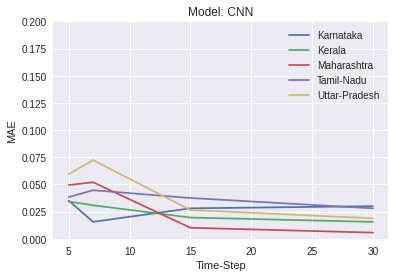

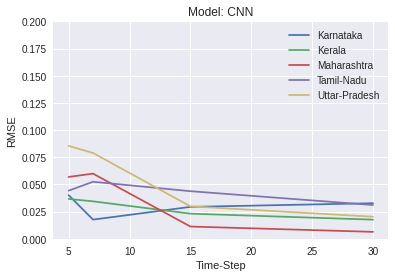

In [ ]:
pd.set_option("display.precision", 3)
Models=['CNN']#,'LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
from IPython.display import display
for model in Models:
  print(model+' model')
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+".csv").drop(columns =["Unnamed: 0"])
  df=df[df['State']!='Delhi']
  #print(df.head())
  temp1=df.groupby(['State','Time_Step']).apply(lambda df: df.loc[df.RMSE.idxmin()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  display(temp1)
  #temp1=temp1.sort_values(["State","Time_Step"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae=list(temp1['MAE'])
  rmse=list(temp1['RMSE'])
  states=list(temp1['State'])
  try:
    for i,state in enumerate(set(states)):
      x=4*i
      y=x+4
      plt.plot([5,7,15,30],mae[x:y], label=states[x])

    plt.legend()
    plt.ylabel('MAE')
    plt.xlabel('Time-Step')
    plt.ylim((0,0.2))
    plt.title("Model: "+model)
    plt.show()

    for i,state in enumerate(set(states)):
      x=4*i
      y=x+4
      plt.plot([5,7,15,30],rmse[x:y], label=states[x])

    plt.legend()
    plt.ylabel('RMSE')
    plt.xlabel('Time-Step')
    plt.ylim((0,0.2))
    plt.title("Model: "+model)
    plt.show()
  except:
    pass

LSTM model


,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Karnataka,5,5,1,1,0.038,0.055,0.946
1,Karnataka,5,7,1,1,0.049,0.065,0.919
2,Kerala,5,5,1,1,0.020,0.028,0.983
3,Kerala,5,7,1,1,0.027,0.033,0.977
4,Kerala,1,15,1,1,0.022,0.025,0.984
5,Maharashtra,1,5,1,8,0.006,0.007,0.998
6,Maharashtra,1,7,1,32,0.014,0.018,0.987
7,Maharashtra,4,15,1,16,0.022,0.025,0.962
8,Tamil-Nadu,5,5,1,1,0.030,0.041,0.969
9,Tamil-Nadu,5,7,1,1,0.039,0.050,0.953


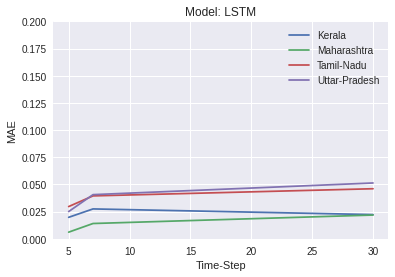

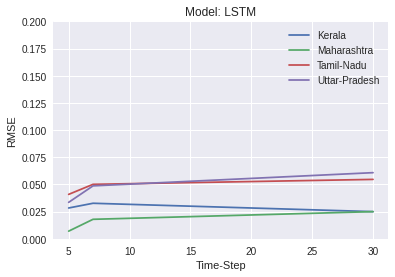

GRU model


,State,Number_feature,Time_Step,number_layers,number_hiddinen_nodes,MAE,RMSE,R2_Score
0,Karnataka,1,5,1,32,0.093,0.105,0.800
1,Karnataka,1,7,1,32,0.125,0.141,0.622
2,Kerala,1,5,1,16,0.067,0.083,0.852
3,Kerala,1,7,1,16,0.056,0.068,0.898
4,Kerala,6,15,2,32,0.070,0.083,0.824
5,Maharashtra,1,5,1,16,0.027,0.031,0.962
6,Maharashtra,1,7,1,16,0.004,0.005,0.999
7,Maharashtra,1,15,1,16,0.010,0.011,0.993
8,Tamil-Nadu,1,5,1,16,0.053,0.068,0.915
9,Tamil-Nadu,1,7,1,16,0.084,0.100,0.814


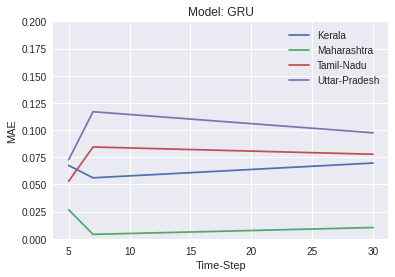

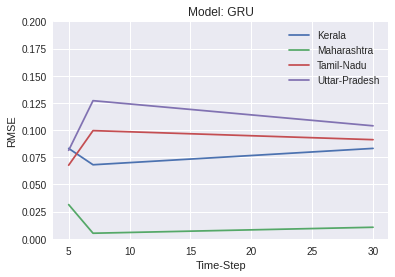

In [ ]:
pd.set_option("display.precision", 3)
Models=['LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
from IPython.display import display
for model in Models:
  print(model+' model')
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+".csv").drop(columns =["Unnamed: 0"])
  df=df[df['State']!='Delhi']
  #print(df.head())
  temp1=df.groupby(['State','Time_Step']).apply(lambda df: df.loc[df.RMSE.idxmin()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  display(temp1)
  #temp1=temp1.sort_values(["State","Time_Step"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae=list(temp1['MAE'])[2:]
  rmse=list(temp1['RMSE'])[2:]
  states=list(temp1['State'])[2:]
  try:
    for i,state in enumerate(set(states)):
      x=3*i
      y=x+3
      plt.plot([5,7,30],mae[x:y], label=states[x])

    plt.legend()
    plt.ylabel('MAE')
    plt.xlabel('Time-Step')
    plt.ylim((0,0.2))
    plt.title("Model: "+model)
    plt.show()

    for i,state in enumerate(set(states)):
      x=3*i
      y=x+3
      plt.plot([5,7,30],rmse[x:y], label=states[x])

    plt.legend()
    plt.ylabel('RMSE')
    plt.xlabel('Time-Step')
    plt.ylim((0,0.2))
    plt.title("Model: "+model)
    plt.show()
  except:
    pass

CNN model


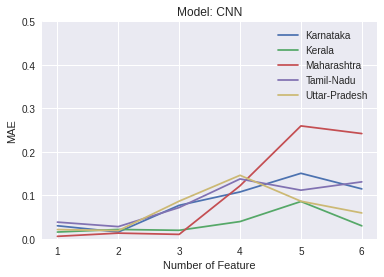

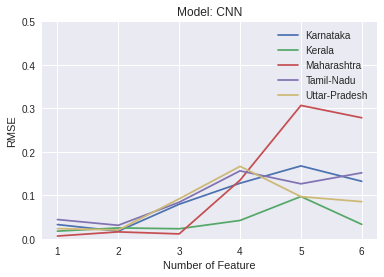

MLP model


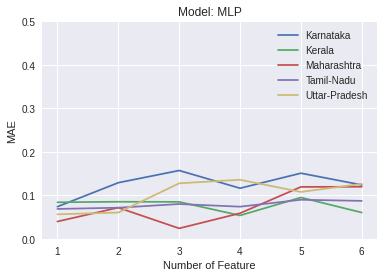

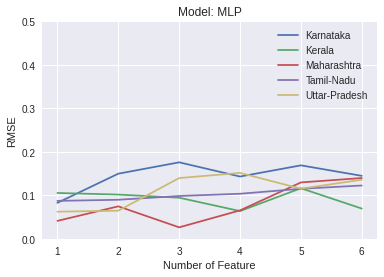

LSTM model


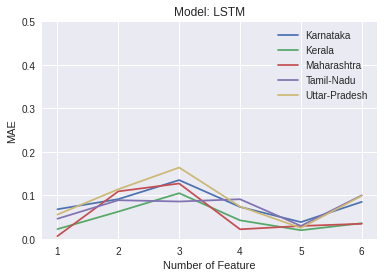

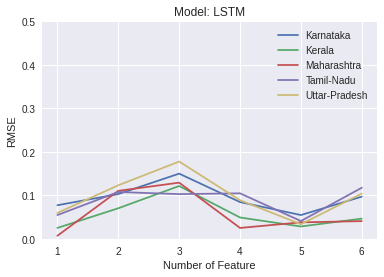

GRU model


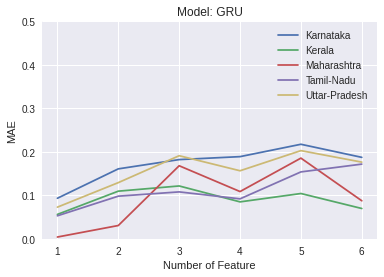

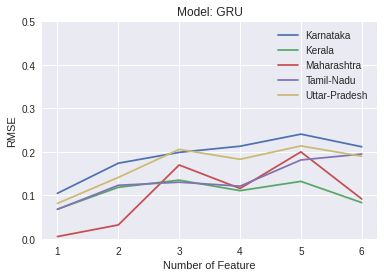

In [ ]:
pd.set_option("display.precision", 3)
Models=['CNN','MLP','LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
from IPython.display import display
for model in Models:
  print(model+' model')
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+".csv").drop(columns =["Unnamed: 0"])
  df=df[df['State']!='Delhi']
  #print(df.head())
  temp1=df.groupby(['State','Number_feature']).apply(lambda df: df.loc[df.RMSE.idxmin()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  #display(temp1)
  #temp1=temp1.sort_values(["State","Time_Step"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae=list(temp1['MAE'])
  rmse=list(temp1['RMSE'])
  states=list(temp1['State'])
  try:
    for i,state in enumerate(set(states)):
      x=6*i
      y=x+6
      plt.plot(range(1,7,1),mae[x:y], label=states[x])

    plt.legend()
    plt.ylabel('MAE')
    plt.xlabel('Number of Feature')
    plt.ylim((0,0.5))
    plt.title("Model: "+model)
    plt.show()

    for i,state in enumerate(set(states)):
      x=6*i
      y=x+6
      plt.plot(range(1,7,1),rmse[x:y], label=states[x])

    plt.legend()
    plt.ylabel('RMSE')
    plt.xlabel('Number of Feature')
    plt.ylim((0,0.5))
    plt.title("Model: "+model)
    plt.show()
  except:
    pass